In [2]:
#Gemini's code

import math
import random

# --- Initialization ---

# 1. Define the system (1D):
#    - Number of particles (N)
#    - Initial positions (X = [x1, x2, ..., xN])
#    - Initial velocities (V = [v1, v2, ..., vN])
#    - Particle masses (M = [m1, m2, ..., mN])
#    - Simulation box size (L) - for potential boundaries if needed

N = 100  # Example: 100 particles
positions = [random.uniform(-1.5, 1.5) for _ in range(N)] # Random initial positions
velocities = [0.0 for _ in range(N)] # Initial velocities set to zero
masses = [1.0 for _ in range(N)] # Example: all particles have unit mass
box_size = 3.0 # Example: a simulation range

# 2. Define the double well potential:
#    U(x) = Uo (1 - x^2)^2
Uo = 1.0 # Depth of the potential wells

def calculate_potential(x, Uo):
    """Calculates the double well potential at position x."""
    return Uo * (1 - x**2)**2

def calculate_force(x, Uo):
    """Calculates the force at position x derived from the double well potential.
    F(x) = -dU/dx = -Uo * 2 * (1 - x^2) * (-2x) = 4 * Uo * x * (1 - x^2)
    """
    return 4 * Uo * x * (1 - x**2)

# 3. Set up simulation parameters:
#    - Time step (dt)
#    - Total number of steps (n_steps)
#    - Frequency of saving/outputting data (output_freq)

dt = 0.01 # Time step
n_steps = 1000 # Total simulation steps
output_freq = 100

# --- Simulation Loop ---

# Initialize time
time = 0.0

# Main loop
for step in range(n_steps):
    # 1. Calculate forces on all particles:
    forces = [calculate_force(positions[i], Uo) for i in range(N)]

    # 2. Update velocities and positions using Velocity Verlet (1D):
    #    v(t + dt/2) = v(t) + (dt/2) * a(t)
    #    x(t + dt)   = x(t) + dt * v(t + dt/2)
    #    a(t + dt)   = F(t + dt) / m
    #    v(t + dt)   = v(t + dt/2) + (dt/2) * a(t + dt)

    velocities_half = [velocities[i] + (dt / 2.0) * (forces[i] / masses[i])
                         for i in range(N)]

    for i in range(N):
        positions[i] = positions[i] + dt * velocities_half[i]

        # Apply potential boundaries (if a particle goes beyond, reverse velocity)
        if positions[i] > box_size or positions[i] < -box_size:
            velocities_half[i] *= -1
            positions[i] = max(-box_size, min(box_size, positions[i])) # Keep within bounds

    forces_new = [calculate_force(positions[i], Uo) for i in range(N)]

    velocities = [velocities_half[i] + (dt / 2.0) * (forces_new[i] / masses[i])
                   for i in range(N)]

    # 3. Update time
    time += dt

    # 4. Output/save data
    if step % output_freq == 0:
        print(f"Step: {step}, Time: {time:.2f}, Positions: {positions[:5]}")
        # You would typically save positions to a file here

# --- End of Simulation ---
print("Simulation finished.")

Step: 0, Time: 0.01, Positions: [-1.36930487057936, 0.3463982116432881, 0.6354602942184359, 0.551564813797786, -0.6329390229586558]
Step: 100, Time: 1.01, Positions: [-0.46629425154547255, 1.025824029882929, 1.209325449353198, 1.2035660899431164, -1.2095602188282824]
Step: 200, Time: 2.01, Positions: [-0.5717504077503067, 0.8528442470186164, 0.7534886284248044, 0.738993815080364, -0.7526946979688666]
Step: 300, Time: 3.01, Positions: [-1.3195273864964765, 0.35684445094437134, 0.8959770536506768, 0.7462632363989304, -0.8920752442141537]
Step: 400, Time: 4.01, Positions: [-0.40363408138342166, 1.1711838826074297, 1.0653721924113246, 1.19619702945951, -1.0686421868190745]
Step: 500, Time: 5.01, Positions: [-0.6943544688600826, 0.7177885272322581, 0.6638259043350174, 0.5514881498523266, -0.6598591633970436]
Step: 600, Time: 6.01, Positions: [-1.1980594676081242, 0.3855935301056251, 1.2633018018796318, 1.1956736249562128, -1.2643082671686223]
Step: 700, Time: 7.01, Positions: [-0.3663005982

In [2]:
# Tweaked:

import math
import random

# --- Initialization ---

# 1. Define the system (1D):
#    - Number of particles (N)
#    - Initial positions (X = [x1, x2, ..., xN])
#    - Initial velocities (V = [v1, v2, ..., vN])
#    - Particle masses (M = [m1, m2, ..., mN])
#    - Simulation box size (L) - for potential boundaries if needed

N = 100  # Example: 100 particles
positions = [random.uniform(-1.5, 1.5) for _ in range(N)] # Random initial positions
velocities = [0.0 for _ in range(N)] # Initial velocities set to zero
masses = [1.0 for _ in range(N)] # Example: all particles have unit mass
box_size = 3.0 # Example: a simulation range

# 2. Define the double well potential:
#    U(x) = Uo (1 - x^2)^2
Uo = 1.0 # Depth of the potential wells

def calculate_potential(x, Uo):
    """Calculates the double well potential at position x."""
    return Uo * (1 - x**2)**2

def calculate_force(x, Uo):
    """Calculates the force at position x derived from the double well potential.
    F(x) = -dU/dx = -Uo * 2 * (1 - x^2) * (-2x) = 4 * Uo * x * (1 - x^2)
    """
    return 4 * Uo * x * (1 - x**2)

# 3. Set up simulation parameters:
#    - Time step (dt)
#    - Total number of steps (n_steps)
#    - Frequency of saving/outputting data (output_freq)

dt = 0.01 # Time step
n_steps = 1000 # Total simulation steps
output_freq = 100

# --- Simulation Loop ---

# Initialize time
time = 0.0

# Main loop
for step in range(n_steps):
    # 1. Calculate forces on all particles:
    forces = [calculate_force(positions[i], Uo) for i in range(N)]

    # 2. Update velocities and positions using Velocity Verlet (1D):
    #    v(t + dt/2) = v(t) + (dt/2) * a(t)
    #    x(t + dt)   = x(t) + dt * v(t + dt/2)
    #    a(t + dt)   = F(t + dt) / m
    #    v(t + dt)   = v(t + dt/2) + (dt/2) * a(t + dt)

    velocities_half = [velocities[i] + (dt / 2.0) * (forces[i] / masses[i])
                         for i in range(N)]

    for i in range(N):
        positions[i] = positions[i] + dt * velocities_half[i]

        # Apply potential boundaries (if a particle goes beyond, reverse velocity)
        if positions[i] > box_size or positions[i] < -box_size:
            velocities_half[i] *= -1
            positions[i] = max(-box_size, min(box_size, positions[i])) # Keep within bounds

    forces_new = [calculate_force(positions[i], Uo) for i in range(N)]

    velocities = [velocities_half[i] + (dt / 2.0) * (forces_new[i] / masses[i])
                   for i in range(N)]

    # 3. Update time
    time += dt

    # 4. Output/save data
    if step % output_freq == 0:
        print(f"Step: {step}, Time: {time:.2f}, Positions: {positions[:5]}")
        # You would typically save positions to a file here

# --- End of Simulation ---
print("Simulation finished.")

Step: 0, Time: 0.01, Positions: [-1.36930487057936, 0.3463982116432881, 0.6354602942184359, 0.551564813797786, -0.6329390229586558]
Step: 100, Time: 1.01, Positions: [-0.46629425154547255, 1.025824029882929, 1.209325449353198, 1.2035660899431164, -1.2095602188282824]
Step: 200, Time: 2.01, Positions: [-0.5717504077503067, 0.8528442470186164, 0.7534886284248044, 0.738993815080364, -0.7526946979688666]
Step: 300, Time: 3.01, Positions: [-1.3195273864964765, 0.35684445094437134, 0.8959770536506768, 0.7462632363989304, -0.8920752442141537]
Step: 400, Time: 4.01, Positions: [-0.40363408138342166, 1.1711838826074297, 1.0653721924113246, 1.19619702945951, -1.0686421868190745]
Step: 500, Time: 5.01, Positions: [-0.6943544688600826, 0.7177885272322581, 0.6638259043350174, 0.5514881498523266, -0.6598591633970436]
Step: 600, Time: 6.01, Positions: [-1.1980594676081242, 0.3855935301056251, 1.2633018018796318, 1.1956736249562128, -1.2643082671686223]
Step: 700, Time: 7.01, Positions: [-0.3663005982

Step: 0, Time: 0.01, Positions (first 5): [-0.016099825464991488, 1.449132513079683, 0.38479126834540045, -0.7682917716461413, -1.092196920595285]

Simulation finished.
   time  particle_0_x  particle_1_x  particle_2_x  particle_3_x  particle_4_x  \
0  0.01       -0.0161      1.449133      0.384791     -0.768292     -1.092197   

   particle_5_x  particle_6_x  particle_7_x  particle_8_x  ...  particle_90_x  \
0     -1.416052      1.064279     -0.873555     -0.821545  ...      -0.031538   

   particle_91_x  particle_92_x  particle_93_x  particle_94_x  particle_95_x  \
0       1.032394      -0.255345       1.342017       0.831536       0.276474   

   particle_96_x  particle_97_x  particle_98_x  particle_99_x  
0      -0.062849      -1.396782       0.434512       1.263285  

[1 rows x 101 columns]


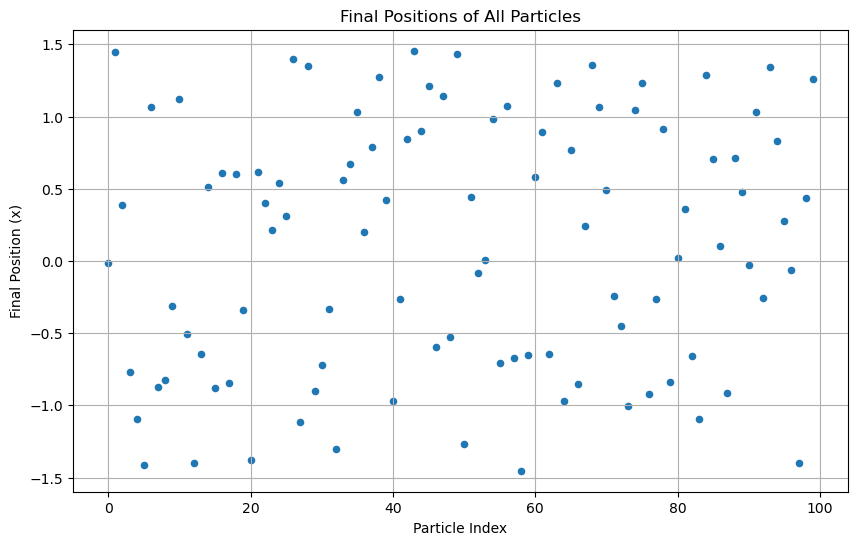

In [15]:
# Tinkered version w/ plotting
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

# --- Initialization ---

# 1. Define the system (1D):
N = 100  # Example: 100 particles
initial_positions = [random.uniform(-1.5, 1.5) for _ in range(N)]
initial_velocities = [random.uniform(-1.5, 1.5) for _ in range(N)]
masses = [1.0 for _ in range(N)]
box_size = 3.0

# 2. Define the double well potential:
Uo = 4.0

def calculate_potential(x, Uo):
    return Uo * (1 - x**2)**2

def calculate_force(x, Uo):
    return 4 * Uo * x * (1 - x**2)

# 3. Set up simulation parameters:
dt = 0.01
n_steps = 100
output_freq = 10000

# --- Simulation ---

time = 0.0
positions = list(initial_positions)
velocities = list(initial_velocities)

# Lists to store trajectory data for the DataFrame
all_times = []
all_positions = []

# Main loop
for step in range(n_steps):
    forces = [calculate_force(positions[i], Uo) for i in range(N)]

    velocities_half = [velocities[i] + (dt / 2.0) * (forces[i] / masses[i])
                         for i in range(N)]

    new_positions = []
    for i in range(N):
        new_x = positions[i] + dt * velocities_half[i]
        if new_x > box_size or new_x < -box_size:
            velocities_half[i] *= -1
            new_x = max(-box_size, min(box_size, new_x))
        new_positions.append(new_x)
    positions = new_positions

    forces_new = [calculate_force(positions[i], Uo) for i in range(N)]

    velocities = [velocities_half[i] + (dt / 2.0) * (forces_new[i] / masses[i])
                   for i in range(N)]

    time += dt

    if step % output_freq == 0:
        print(f"Step: {step}, Time: {time:.2f}, Positions (first 5): {positions[:5]}")
        all_times.append(time)
        all_positions.append(list(positions)) # Store a copy of the positions at this time step

print(f"\nSimulation finished.")
# --- Data Storage using Pandas DataFrame ---

# Create a dictionary to hold the data
data = {'time': all_times}
for i in range(N):
    data[f'particle_{i}_x'] = [pos[i] for pos in all_positions]

# Create a Pandas DataFrame
df = pd.DataFrame(data)
print(df)

# --- Plotting with Matplotlib ---

# Plotting the final positions of all particles as a scatter plot
final_positions = all_positions[-1]  # Get the last set of positions

plt.figure(figsize=(10, 6))
plt.scatter(range(N), final_positions, marker='o', s=20)  # Create a scatter plot
plt.xlabel('Particle Index')
plt.ylabel('Final Position (x)')
plt.title('Final Positions of All Particles')
plt.grid(True)
plt.show()


Step: 0, Time: 0.01, Positions (first 5): [1.429022660954047, -0.6855721233919434, 0.6158578429861129, 1.300640119907072, 0.6386040203297321]
Step: 10000, Time: 100.01, Positions (first 5): [-0.1959007318669351, -0.8159060402399547, 0.7255171624498811, 0.8327584733304554, 1.1330697222072899]
Step: 20000, Time: 200.01, Positions (first 5): [-1.1968217200964457, -0.9913437350131742, 0.8744364756500318, 0.5425500602019784, 0.7155676792336215]
Step: 30000, Time: 300.01, Positions (first 5): [0.39555167209933606, -1.166879325381056, 1.0457995637863184, 0.9795361377242383, 0.9930604574424157]
Step: 40000, Time: 400.01, Positions (first 5): [0.8878275708136681, -1.2699502166766259, 1.2042311565472037, 1.2274188164081976, 0.8268330527406762]
Step: 50000, Time: 500.01, Positions (first 5): [-0.6411545334398167, -1.2444204120269915, 1.3000359222041205, 0.6303930334792318, 0.85341283422145]
Step: 60000, Time: 600.01, Positions (first 5): [-0.5991712829975302, -1.1051436383335327, 1.29467596857748

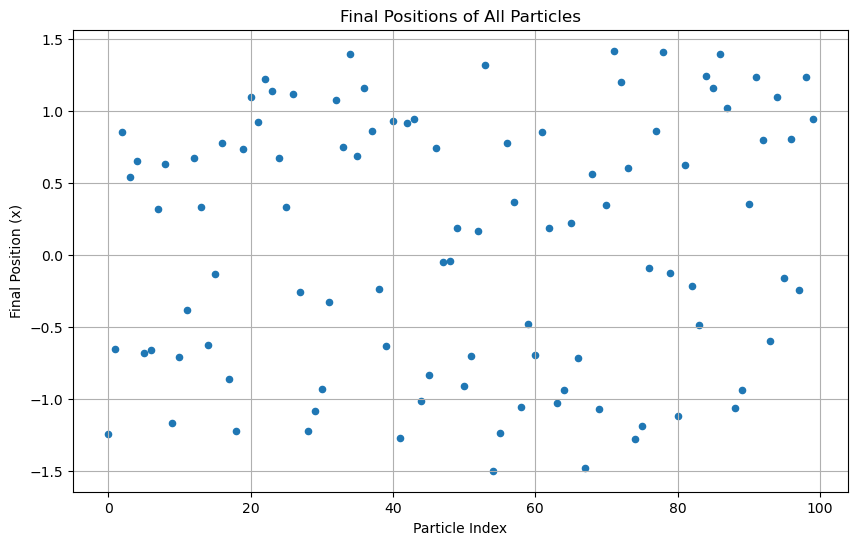

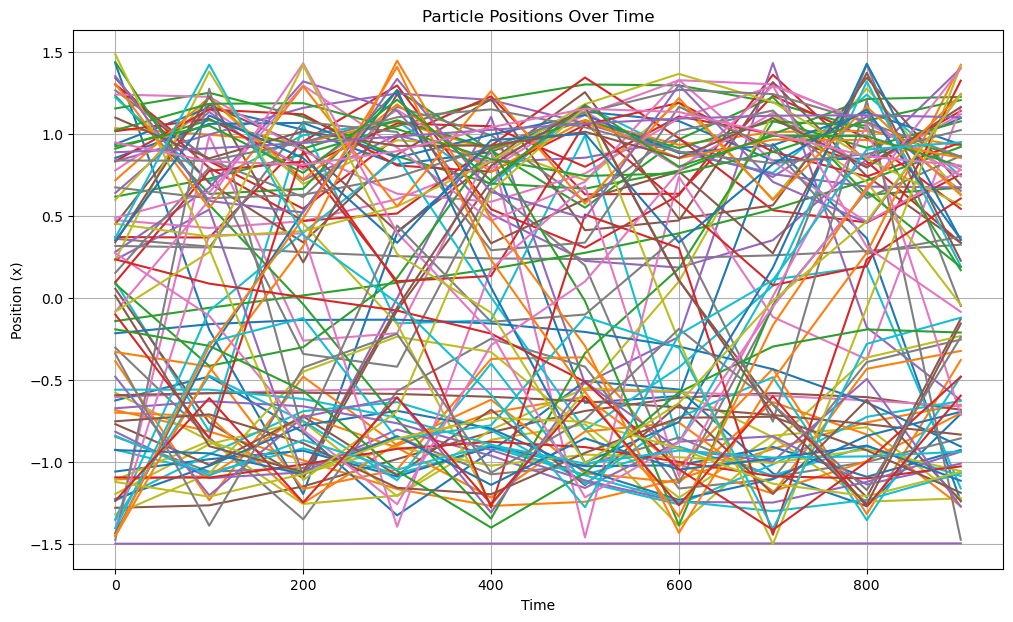

In [23]:
# written from scratch
# ver 1.0
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

# --initialisation--

# 1) system set up
N = 100 # no. of particles
init_pos = [random.uniform(-1.5, 1.5) for i in range(N)] # initial positions
init_vel = [random.uniform(-1.5, 1.5) for i in range(N)] # initial velocities
masses = [1.0 for i in range(N)] # masses of each of the particles
# box = 3.0 

# 2) defining forcefield 
Uo = 4.0

# function to calculate force
# F = -dU/dx ; U = Uo[(1-x^2)^2]
def calc_force(x):
    return 4* Uo* x* (1-x**2)

# 3) simlulation parameters
n_steps = 100000
output_freq = 10000
dt = 0.01 # time step

# --simulation--
time = 0.0
positions = init_pos
velocities = init_vel

# lists to save trajectory data
all_times = []
all_positions = []

# main loop: integrator (velocity verlet)
for step in range(n_steps):
    forces = [calc_force(positions[i]) for i in range(N)] # calculating forces at the beginning of the loop
    velocities = [velocities[i] + 0.5*dt *forces[i]/masses[i] for i in range(N)] # calculating velocities at dt/2 according to these forces 
    positions = [positions[i] + dt*velocities[i] for i in range(N)] # calculating positions at dt
    forces = [calc_force(positions[i]) for i in range(N)] # recaclculating forces for new positions (dt)
    velocities = [velocities[i] + 0.5*dt*forces[i]/masses[i] for i in range(N)]
    time += dt

    if step % output_freq == 0: # saving the positions and velocities 
        all_times.append(time)
        all_positions.append(positions)
        print(f"Step: {step}, Time: {time:.2f}, Positions (first 5): {positions[:5]}")

print("Simulation finished.")

# --data storage--
data = {'time': all_times}
for i in range(N):
    data[f'particle_{i}_x'] = [pos[i] for pos in all_positions]

# Create a df
df = pd.DataFrame(data)
print(df)

# --plotting--
# Plotting the final positions of all particles as a scatter plot
final_positions = all_positions[-1]  # Get the last set of positions
particle_index = range(0,N)

plt.figure(figsize=(10, 6))
plt.scatter(particle_index, final_positions, marker='o', s=20)  # Create a scatter plot
plt.xlabel('Particle Index')
plt.ylabel('Final Position (x)')
plt.title('Final Positions of All Particles')
plt.grid(True)
plt.show()

# Plotting Position vs. Time for a few particles
particles_to_plot_trajectories = min(100, N) 

plt.figure(figsize=(12, 7))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_x'], label=f'Particle {i}')

plt.xlabel('Time')
plt.ylabel('Position (x)')
plt.title('Particle Positions Over Time')
#plt.legend()
plt.grid(True)
plt.show()


Step: 0, Time: 0.01
Step: 1000, Time: 10.01
Step: 2000, Time: 20.01
Step: 3000, Time: 30.01
Step: 4000, Time: 40.01
Step: 5000, Time: 50.01
Step: 6000, Time: 60.01
Step: 7000, Time: 70.01
Step: 8000, Time: 80.01
Step: 9000, Time: 90.01
Simulation finished.


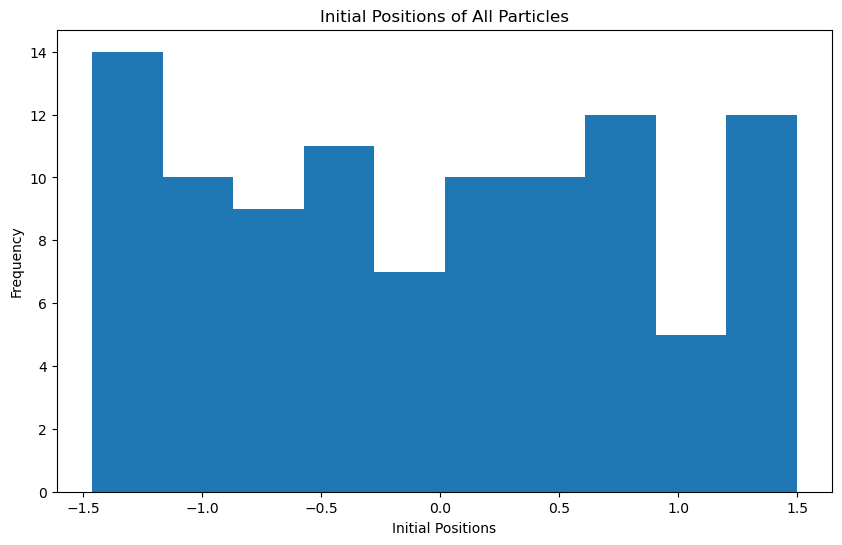

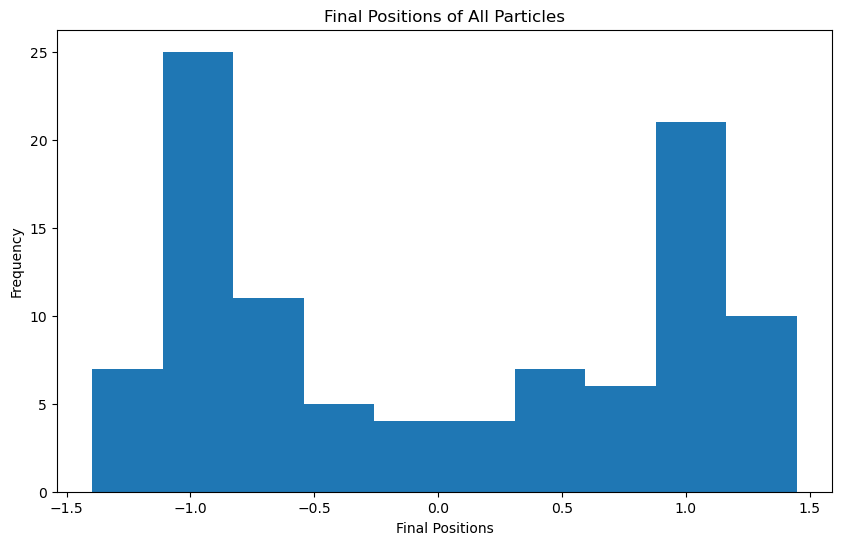

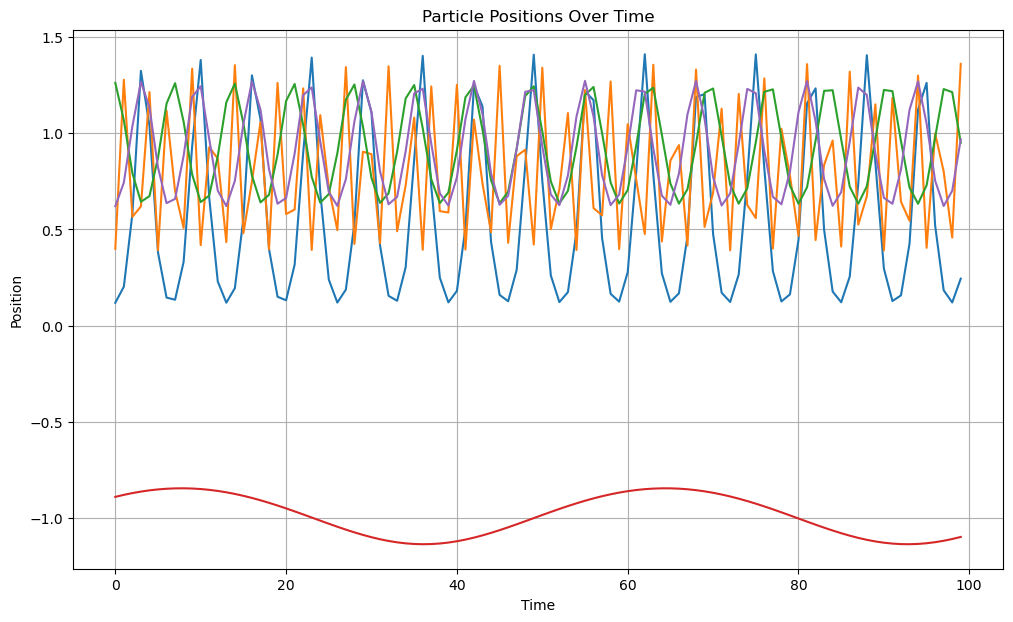

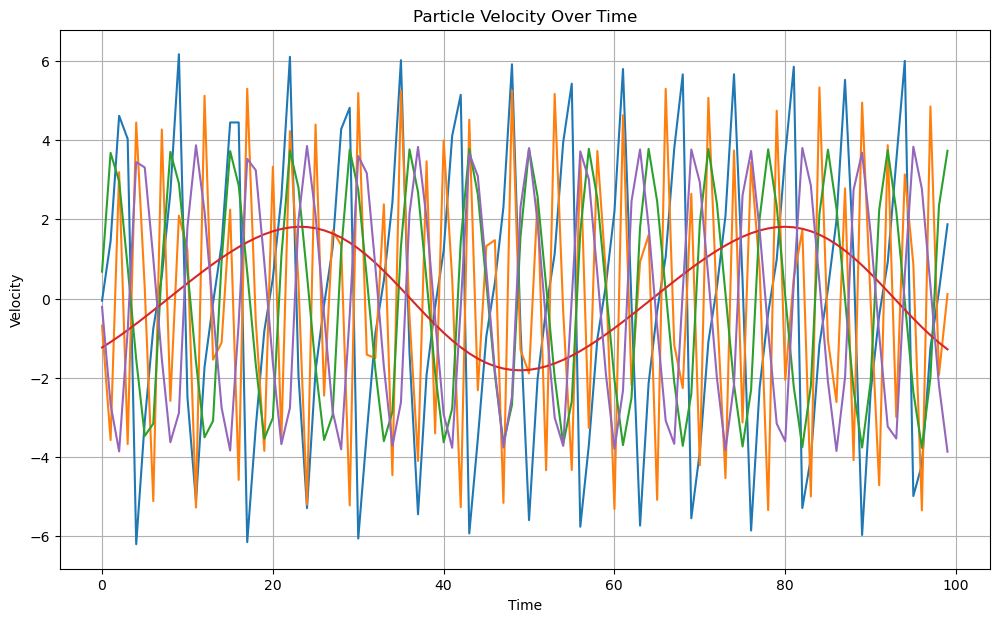

In [31]:
# written from scratch
# ver 1.1
# + to make a histogram of final and initial positions, velocity vs time graphs
import math
import random
import matplotlib.pyplot as plt
import pandas as pd

# --initialisation--

# 1) system set up
N = 100 # no. of particles
init_pos = [random.uniform(-1.5, 1.5) for i in range(N)] # initial positions
init_vel = [random.uniform(-1.5, 1.5) for i in range(N)] # initial velocities
m = [1.0 for i in range(N)] # masses of each of the particles
# box = 3.0 

# 2) defining forcefield 
Uo = 20.0

# function to calculate force
# F = -dU/dx ; U = Uo[(1-x^2)^2]
def calc_force(x):
    return 4* Uo* x* (1-x**2)

# 3) simlulation parameters
n_steps = 10000
output_freq = 100
dt = 0.01 # time step

# --simulation--
time = 0.0
positions = init_pos
velocities = init_vel

# lists to save trajectory data
all_times = []
all_positions = []
all_velocities = []

# main loop: integrator (3 step velocity verlet)
for step in range(n_steps):
    
    # calculating forces at the beginning of the loop
    forces = [calc_force(positions[i]) for i in range(N)] 
    
    # calculating velocities at dt/2 according to these forces
    velocities = [velocities[i] + 0.5*dt *forces[i]/masses[i] for i in range(N)]  

    # calculating positions at dt
    positions = [positions[i] + dt*velocities[i] for i in range(N)] 

    # recaclculating forces for new positions (dt)
    forces = [calc_force(positions[i]) for i in range(N)]

    # calculating velocities at dt according to the new forces
    velocities = [velocities[i] + 0.5*dt*forces[i]/masses[i] for i in range(N)]
    
    time += dt

    if step % output_freq == 0: # saving the positions and velocities 
        all_times.append(time)
        all_positions.append(positions)
        all_velocities.append(velocities)
    if step%(output_freq*10) == 0:
        print(f"Step: {step}, Time: {time:.2f}")

print("Simulation finished.")

# --data storage--
data = {'time': all_times}
for i in range(N):
    data[f'particle_{i}_x'] = [x[i] for x in all_positions]
    data[f'particle_{i}_v'] = [v[i] for v in all_velocities]

# Create a df
df = pd.DataFrame(data)

# --plotting--
# Plotting the final positions of all particles as a histogram
final_positions = all_positions[-1]  # Get the last set of positions
initial_positions = list(init_pos)
particle_index = range(0,N)

plt.figure(figsize=(10, 6))
plt.hist(initial_positions)  
plt.xlabel('Initial Positions')
plt.ylabel('Frequency')
plt.title('Initial Positions of All Particles')
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(final_positions)  
plt.xlabel('Final Positions')
plt.ylabel('Frequency')
plt.title('Final Positions of All Particles')
plt.show()

# Plotting Position vs. Time for a few particles
particles_to_plot_trajectories = min(5, N) 

plt.figure(figsize=(12, 7))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_x'], label=f'Particle {i}')

plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Particle Positions Over Time')
#plt.legend()
plt.grid(True)
plt.show()

# Plotting Velocity vs. Time for a few particles
particles_to_plot_trajectories = min(5, N) 

plt.figure(figsize=(12, 7))
for i in range(particles_to_plot_trajectories):
    plt.plot(df['time'], df[f'particle_{i}_v'], label=f'Particle {i}')

plt.xlabel('Time')
plt.ylabel('Velocity')
plt.title('Particle Velocity Over Time')
#plt.legend()
plt.grid(True)
plt.show()


In [23]:
# written from scratch
# ver 1.2
# + code to calculate total KE, PE and TE at each frame

import math
import random
import matplotlib.pyplot as plt
import pandas as pd

# --initialisation--

# 1) system set up
N = 100 # no. of particles
init_pos = [random.uniform(-1.5, 1.5) for i in range(N)] # initial positions
init_vel = [random.uniform(-1.5, 1.5) for i in range(N)] # initial velocities
masses = [1.0 for i in range(N)] # masses of each of the particles

# 2) defining forcefield 
Uo = 20.0

# function to calculate force
# F = -dU/dx ; U = Uo[(1-x^2)^2]
def calc_force(x):
    return 4* Uo* x* (1-x**2)

# 3) simlulation parameters
n_steps = 1000
dt = 0.01 # time step

# --simulation--
time = 0.0
positions = init_pos
velocities = init_vel

# lists to save trajectory data
all_times = []
all_positions = []
all_velocities = []
all_KE = []
all_PE = []
all_TE = []

# main loop: integrator (3 step velocity verlet)
for step in range(n_steps):
    
    # calculating forces at the beginning of the loop
    forces = [calc_force(positions[i]) for i in range(N)] 
    
    # calculating velocities at dt/2 according to these forces
    velocities = [velocities[i] + 0.5*dt *forces[i]/masses[i] for i in range(N)]  

    # calculating positions at dt
    positions = [positions[i] + dt*velocities[i] for i in range(N)] 

    # recaclculating forces for new positions (dt)
    forces = [calc_force(positions[i]) for i in range(N)]

    # calculating velocities at dt according to the new forces
    velocities = [velocities[i] + 0.5*dt*forces[i]/masses[i] for i in range(N)]

    # calculating PE, KE, and TE
    KE = sum((0.5 * masses[i] * (velocities[i])**2) for i in range(N))
    PE = sum(Uo * (1 - positions[i]**2)**2 for i in range(N))
    TE = KE + PE
    
    time += dt

    # saving the positions and velocities 
    all_times.append(time)
    all_positions.append(positions)
    all_velocities.append(velocities)
    all_PE.append(PE)
    all_KE.append(KE)
    all_TE.append(TE)

    if step%(n_steps/10) == 0: # terminal output once every 100 steps
        print(f"Step: {step}, Time: {time:.2f}")

print("Simulation finished.")

# --data storage--
data = {'time': all_times}

for i in range(N):
    data[f'particle_{i}_x'] = [x[i] for x in all_positions]
    data[f'particle_{i}_v'] = [v[i] for v in all_velocities]

# Create a df
df = pd.DataFrame(data)
df['PE'] = all_PE
df['KE'] = all_KE
df['TE'] = all_TE

# output CSV
df.to_csv('md_out.csv', index=False)
print(f'Output CSV file: md_out.csv')

Step: 0, Time: 0.01
Step: 100, Time: 1.01
Step: 200, Time: 2.01
Step: 300, Time: 3.01
Step: 400, Time: 4.01
Step: 500, Time: 5.01
Step: 600, Time: 6.01
Step: 700, Time: 7.01
Step: 800, Time: 8.01
Step: 900, Time: 9.01
Simulation finished.
Output CSV file: md_out.csv
